In [10]:
import numpy as np
from lbmpy.session import *
from lbmpy.phasefield.experiments2D import *
from lbmpy.phasefield.post_processing import *
from lbmpy.phasefield.contact_angle_circle_fitting import *

# Testing Neumann angle evaluation based on circle fitting

Set up a 3 phase model to have example data

In [11]:
kappa3 = 0.03
alpha = 1

sc = liquid_lens_setup(domain_size=(150, 60), optimization={'target': 'cpu'}, 
                       kappas=(0.01, 0.02, kappa3), 
                       cahn_hilliard_relaxation_rates=[np.nan, 1, 3/2], 
                       cahn_hilliard_gammas=[1, 1, 1/3],
                       alpha=alpha)

In [12]:
sc.run(10000)

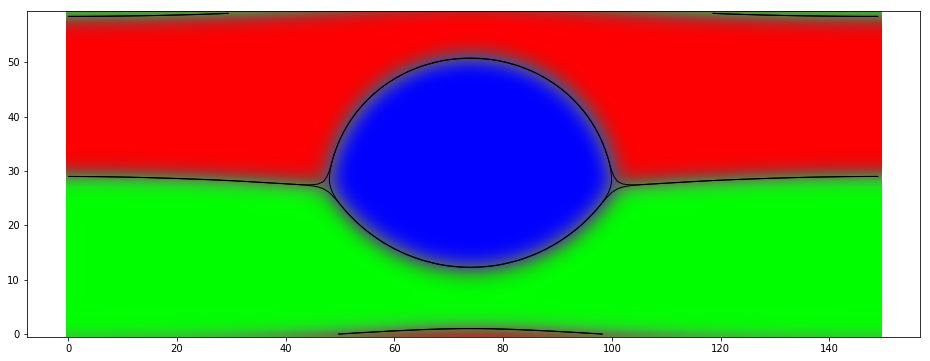

In [13]:
plt.phase_plot_for_step(sc)

In [14]:
angles = liquid_lens_neumann_angles(sc.concentration[:, :, :])
assert sum(angles) == 360
angles

In [15]:
analytic_angles = analytic_neumann_angles([0.01, 0.02, kappa3])
analytic_angles

In [17]:
for ref, simulated in zip(analytic_angles, angles):
    assert np.abs(ref - simulated) < 8